In [121]:
import pandas as pd
import numpy as np

In [122]:
train=pd.read_csv('Data_Train.csv')
test=pd.read_csv('Data_Test.csv')
train.head()

,Unique_ID,Name,Genre,Country,Song_Name,Timestamp,Views,Comments,Likes,Popularity,Followers
0,413890,Hardstyle,danceedm,AU,N-Vitral presents BOMBSQUAD - Poison Spitter (...,2018-03-30 15:24:45.000000,14017,4,499,97,119563
1,249453,Dj Aladdin,danceedm,AU,Dj Aladdin - Old School Hip Hop Quick Mix,2016-06-20 05:58:52.000000,1918,17,49,17,2141
2,681116,Maxximize On Air,danceedm,AU,Maxximize On Air - Mixed by Blasterjaxx - Epis...,2015-05-08 17:45:59.000000,9668,11,312,91,22248
3,387253,GR6 EXPLODE,rbsoul,AU,MC Yago - Tenho Compromisso (DJ R7),2017-06-08 23:50:03.000000,113036,2,"2,400",76,393655
4,1428029,Tritonal,danceedm,AU,Escape (feat. Steph Jones),2016-09-17 20:50:19.000000,110024,81,"3,031",699,201030


In [123]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78458 entries, 0 to 78457
Data columns (total 11 columns):
Unique_ID     78458 non-null int64
Name          78458 non-null object
Genre         78458 non-null object
Country       78458 non-null object
Song_Name     78457 non-null object
Timestamp     78458 non-null object
Views         78458 non-null int64
Comments      78458 non-null int64
Likes         78458 non-null object
Popularity    78458 non-null object
Followers     78458 non-null int64
dtypes: int64(4), object(7)
memory usage: 6.6+ MB


In [124]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19615 entries, 0 to 19614
Data columns (total 10 columns):
Unique_ID     19615 non-null int64
Name          19615 non-null object
Genre         19615 non-null object
Country       19615 non-null object
Song_Name     19615 non-null object
Timestamp     19615 non-null object
Comments      19615 non-null int64
Likes         19615 non-null object
Popularity    19615 non-null object
Followers     19615 non-null int64
dtypes: int64(3), object(7)
memory usage: 1.5+ MB


In [125]:
train.describe()

,Unique_ID,Views,Comments,Followers
count,7.845800e+04,7.845800e+04,78458.000000,7.845800e+04
mean,7.451701e+05,5.469686e+05,115.270973,4.787663e+05
std,4.805507e+05,3.883085e+06,724.614868,1.168120e+06
min,0.000000e+00,0.000000e+00,0.000000,1.000000e+00
25%,3.149512e+05,6.216500e+03,1.000000,1.770000e+04
50%,6.618655e+05,2.538650e+04,12.000000,8.768200e+04
75%,1.176618e+06,1.201342e+05,61.000000,3.936550e+05
max,1.570012e+06,1.994050e+08,104082.000000,9.789123e+06


In [126]:
train.shape[0], train.columns

(78458,
 Index(['Unique_ID', 'Name', 'Genre', 'Country', 'Song_Name', 'Timestamp',
        'Views', 'Comments', 'Likes', 'Popularity', 'Followers'],
       dtype='object'))

In [127]:
train['Name'].unique().shape

(1209,)

In [128]:
train['Genre'].unique().shape

(21,)

In [129]:
train['Country'].unique().shape

(1,)

In [130]:
import matplotlib.pyplot as plt

In [131]:
genre=train.groupby('Genre')['Views'].sum()
#genre=pd.DataFrame(genre, index=genre.index)
genre

Genre
all-music               25190526250
alternativerock           133316306
ambient                   337553706
classical                 301577002
country                    98953948
danceedm                 6036237365
deephouse                 151799707
disco                     137688837
drumbass                   24912470
dubstep                   264817416
electronic               3183184217
folksingersongwriter       18538345
hiphoprap                 214516083
indie                      18235488
latin                    1078477156
metal                      67376149
pop                       644772688
rbsoul                   3297552456
reggaeton                  63205470
rock                      530061055
trap                     1120763364
Name: Views, dtype: int64

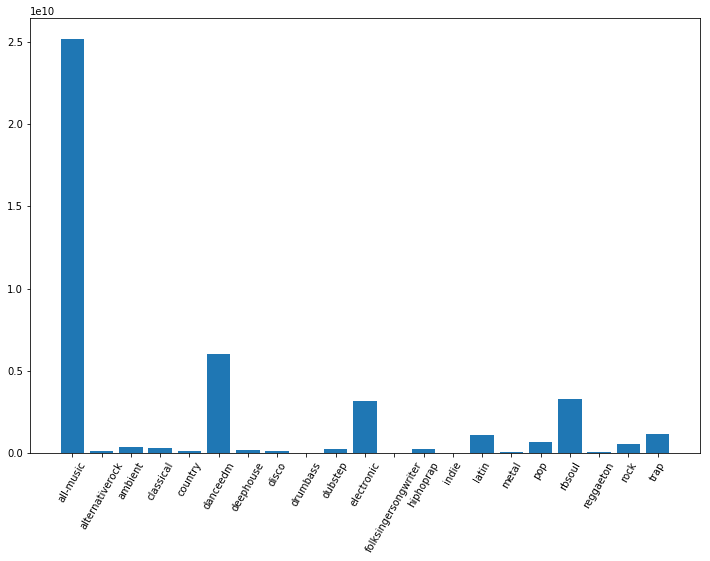

In [132]:
plt.figure(figsize=(12,8))
plt.bar(genre.index,genre.values)
plt.xticks(rotation=60)
plt.show()

In [133]:
train.head(2)

,Unique_ID,Name,Genre,Country,Song_Name,Timestamp,Views,Comments,Likes,Popularity,Followers
0,413890,Hardstyle,danceedm,AU,N-Vitral presents BOMBSQUAD - Poison Spitter (...,2018-03-30 15:24:45.000000,14017,4,499,97,119563
1,249453,Dj Aladdin,danceedm,AU,Dj Aladdin - Old School Hip Hop Quick Mix,2016-06-20 05:58:52.000000,1918,17,49,17,2141


In [134]:
# spliting month and year from timestamp
train['Year']=train['Timestamp'].apply(lambda x:x.split('-')[0])
train['Month']=train['Timestamp'].apply(lambda x:x.split('-')[1])
train=train.drop('Timestamp',1)
# for test df
test['Year']=test['Timestamp'].apply(lambda x:x.split('-')[0])
test['Month']=test['Timestamp'].apply(lambda x:x.split('-')[1])
test=test.drop('Timestamp',1)

In [135]:
train.head(2)

,Unique_ID,Name,Genre,Country,Song_Name,Views,Comments,Likes,Popularity,Followers,Year,Month
0,413890,Hardstyle,danceedm,AU,N-Vitral presents BOMBSQUAD - Poison Spitter (...,14017,4,499,97,119563,2018,03
1,249453,Dj Aladdin,danceedm,AU,Dj Aladdin - Old School Hip Hop Quick Mix,1918,17,49,17,2141,2016,06


In [136]:
# likes and Popularity having chars like '.', ',', 'K' and 'M'
# for converting them to int, we need to first remove those characters
def like_pop_dtype(df,col):
    new=[]
    for i in df[col]:
        if i.isdigit()==True:
            new.append(i)
        else:
            if 'K' in i:
                k=i.strip('K')+'000'
                new.append(k.replace('.','')[:-1]) if '.' in k else  new.append(k)
            elif 'M' in i:
                m=i.strip('M')+'000000'
                new.append(m.replace('.','')[:-1]) if '.' in m else  new.append(m)
            elif ',' in i:
                new.append(i.replace(',',''))
    return new   

In [137]:
train['Likes']=like_pop_dtype(train, 'Likes')
train['Popularity']=like_pop_dtype(train, 'Popularity')

test['Likes']=like_pop_dtype(test, 'Likes')
test['Popularity']=like_pop_dtype(test, 'Popularity')

In [138]:
# change dtype of each feature to int having numeric data
def dtype_change(df):
    for i in df:
        if df[i].dtypes=='object':
            try:
                df[i]=df[i].astype(int)
            except:
                df[i]=df[i].astype(str)
    return df

In [139]:
train=dtype_change(train)
test=dtype_change(test)

In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78458 entries, 0 to 78457
Data columns (total 12 columns):
Unique_ID     78458 non-null int64
Name          78458 non-null object
Genre         78458 non-null object
Country       78458 non-null object
Song_Name     78458 non-null object
Views         78458 non-null int64
Comments      78458 non-null int64
Likes         78458 non-null int32
Popularity    78458 non-null int32
Followers     78458 non-null int64
Year          78458 non-null int32
Month         78458 non-null int32
dtypes: int32(4), int64(4), object(4)
memory usage: 6.0+ MB


In [141]:
train.columns

Index(['Unique_ID', 'Name', 'Genre', 'Country', 'Song_Name', 'Views',
       'Comments', 'Likes', 'Popularity', 'Followers', 'Year', 'Month'],
      dtype='object')

In [142]:
dtrain=train.copy()
dtest=test.copy()

In [143]:
dtrain=dtrain.drop(['Unique_ID','Name','Country','Song_Name'],1)
dtest=dtest.drop(['Unique_ID','Name','Country','Song_Name'],1)

### dummies for genre feature

In [144]:
def get_dummy(df, col):
    dummy=pd.get_dummies(df[col], drop_first=True)
    df=pd.concat([df,dummy],1)
    df.drop(col,1,inplace=True)
    return df

In [145]:
dtrain=get_dummy(dtrain, 'Genre')
dtest=get_dummy(dtest, 'Genre')

In [146]:
dtrain.shape, dtest.shape

((78458, 27), (19615, 26))

In [147]:
X=dtrain.drop('Views',1)
y=dtrain['Views']

# scaling

In [148]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [149]:
scale=StandardScaler()

In [150]:
X=scale.fit_transform(X)
dtest=scale.fit_transform(dtest)

In [151]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [152]:
x_train, x_val, y_train, y_val=train_test_split(X,y,shuffle=False)
x_test=dtest

### KFold

In [153]:
kf=KFold(n_splits=5, shuffle=False)

### LinearRegression

In [154]:
model=LinearRegression()
score=cross_val_score(model,X,y,cv=kf)
score

array([0.77478725, 0.74469649, 0.84183438, 0.82319556, 0.79943006])

### RandomForestRegressor

In [155]:
model=RandomForestRegressor(15)
score=cross_val_score(model,X,y,cv=kf)
score

array([0.97080816, 0.96568388, 0.97943382, 0.93638643, 0.97008951])

### validation

In [156]:
model=RandomForestRegressor(15)
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [187]:
ypred=model.predict(x_test)

In [188]:
ypred=ypred.astype(str)
ypred=[int(i.split('.')[0]) for i in ypred]

In [192]:
final_submission=pd.DataFrame({'Unique_ID':test['Unique_ID'], 'Views':ypred})

In [195]:
final_submission.to_excel('chartbusters_submission.xlsx',index=False)